

# Project: No-show appointments


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
● ‘Neighborhood’ indicates the location of the hospital.
● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [85]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties, a quick look to the data

In [87]:
# Loading the data and printing out a few lines. 
df=pd.read_csv('no show appointment.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [88]:
#showing the shape and info of the data
df.shape


(110527, 14)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [60]:
#checking if there missing valuse in the data
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [61]:
#checking if there duplicates in the data
sum(df.duplicated())


0

There are no missing values or duplicates in the data to be cleaned 

Now I will make some edites to the names of the columns and the data type of some columns to make it easier to work with

In [90]:
#change column label initials to lower case letters
#replace (-) by (_)
df.columns = [column.strip().lower().replace('-','_') for column in df.columns]


In [91]:
#correct spelling errors
df.rename({'hipertension':'hypertension'}, axis=1, inplace=True)
df.rename({'handcap': 'handicap'}, axis=1, inplace=True)

In [92]:
#change (no_show) column name to (show) to avoid conflicts 
df.rename(columns={'no_show':'show'}, inplace=True)

In [93]:
#covert categorical data to quantative data, So that I can do statistics on it
df['show'].replace(['No', 'Yes'], [1,0], inplace = True)
df['gender'].replace(['M', 'F'], [0,1], inplace = True)

explore some statisticals of the data



In [66]:
df.describe()


,patientid,appointmentid,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,0.649977,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,2.560949e+14,7.129575e+04,0.476979,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173184e+13,5.680573e+06,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.439172e+13,5.725524e+06,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,5.790484e+06,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


The min value for age is negative!
It doesn't make sense for age to be negative, so I'll delete rows with age less than zero.

In [94]:
df.drop(df[df['age']< 0].index, inplace = True)

Droping the unused features


In [95]:
df.drop(['patientid','appointmentid','scheduledday','appointmentday'],axis=1,inplace=True)



### Data Cleaning (Replace this with more specific notes!)

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question : What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'scholarship'}>],
       [<AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'alcoholism'}>],
       [<AxesSubplot:title={'center':'handicap'}>,
        <AxesSubplot:title={'center':'sms_received'}>,
        <AxesSubplot:title={'center':'show'}>]], dtype=object)

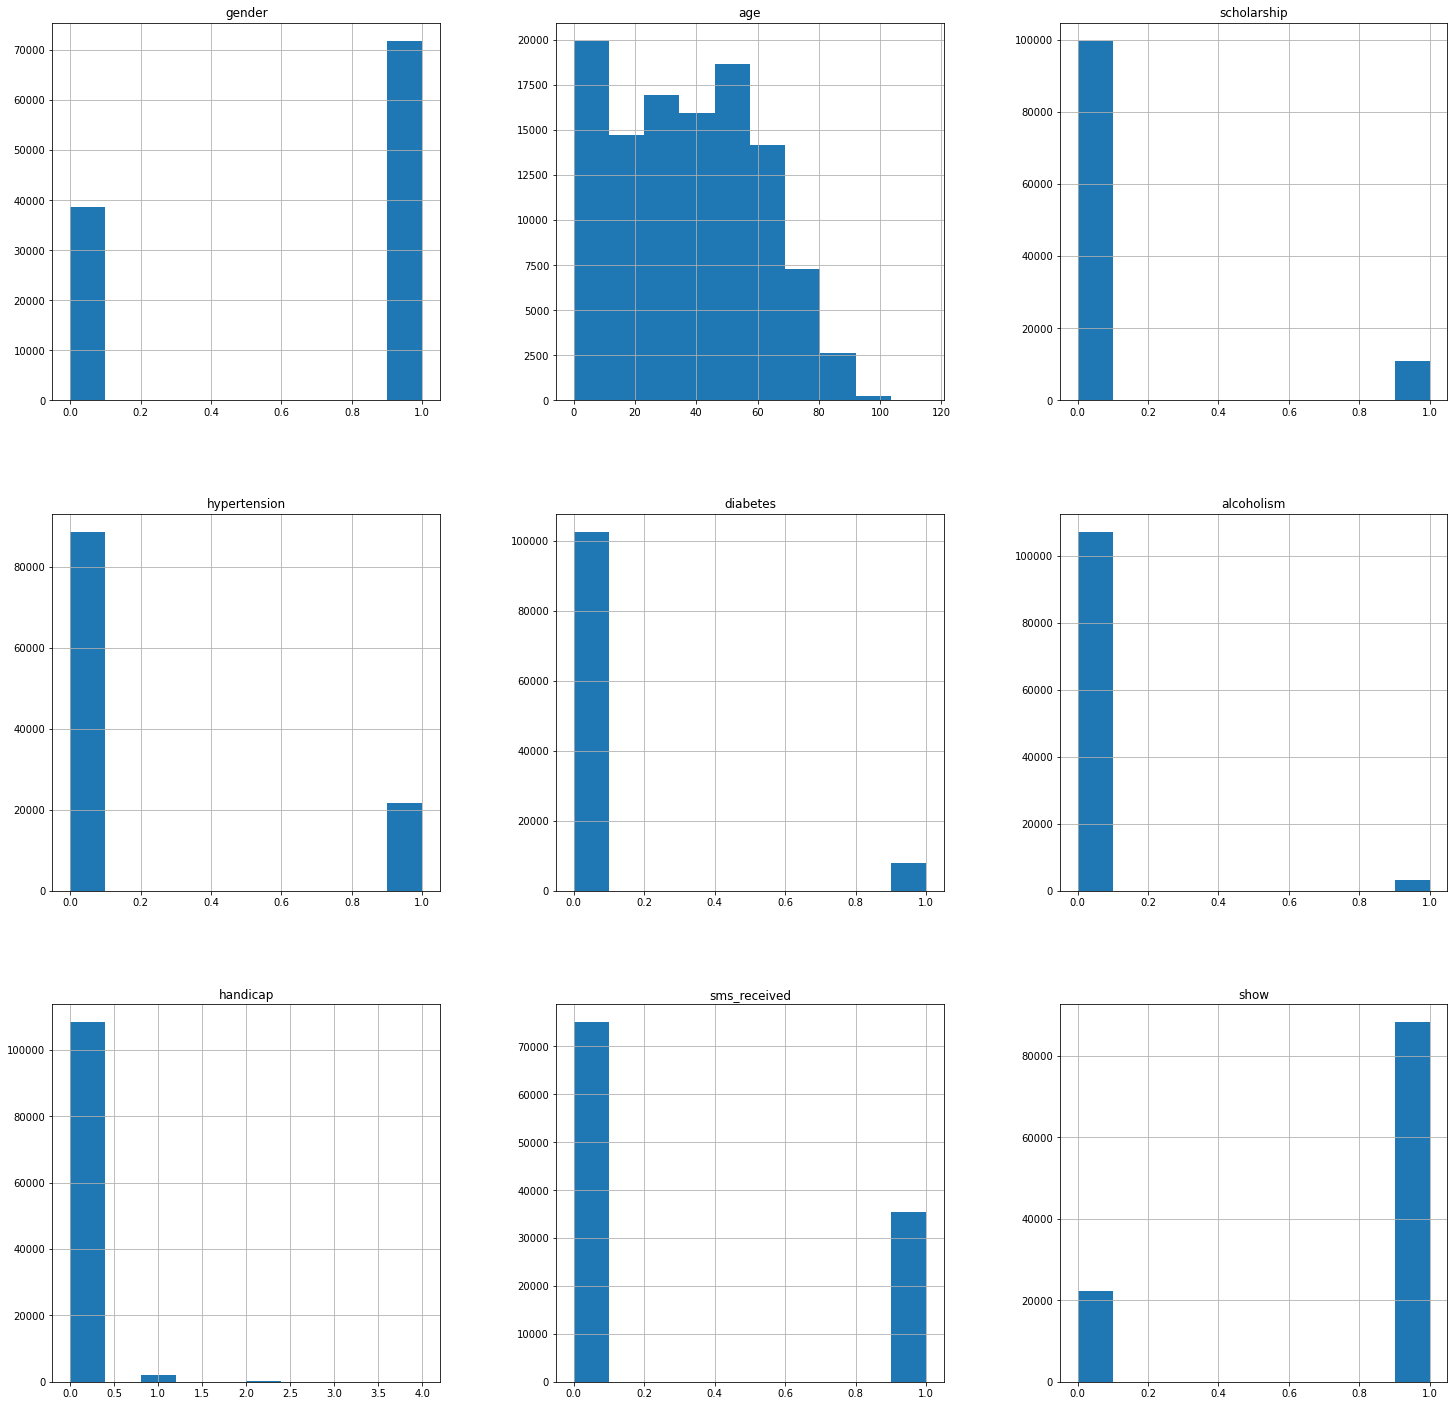

In [96]:
df.hist(figsize=(25,25))


To answer this question we need to calculate the correlation of (show) column and other columns

In [97]:
df.corrwith(df['show'])


gender         -0.004122
age             0.060327
scholarship    -0.029134
hypertension    0.035704
diabetes        0.015181
alcoholism      0.000197
handicap        0.006077
sms_received   -0.126428
show            1.000000
dtype: float64

# Conclusions

We looked at the correlation between showing up for the appointment and the other variables in the data.
We found that showing up for the appointment or not is direcly related to the number of SMS messages received. 